c:\Users\RATNAKUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 5
[LightGBM] [Info] Start training from score 3002.917105


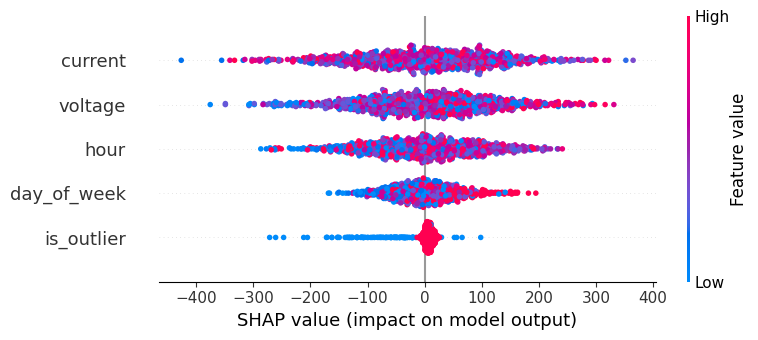

In [1]:
import lightgbm as lgb
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
clean_data = pd.read_csv("../data/processed/cleaned_data.csv")

# Train model
model = lgb.LGBMRegressor()
model.fit(clean_data.drop(columns=['power']), clean_data['power'])

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(clean_data.drop(columns=['power']))

shap.summary_plot(shap_values, clean_data.drop(columns=['power']))